In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [23]:
data=pd.read_csv("C:/Users/sonu_/Downloads/archive/Expanded_data_with_more_features.csv")
data.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [24]:
data.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [26]:
data.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [27]:
data.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [28]:
#removing unwanted columns
data=data.drop("Unnamed: 0",axis=1)

In [29]:
#"unnamed " removed
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [31]:
#counting gender distributins
data["Gender"].value_counts()

Gender
female    15424
male      15217
Name: count, dtype: int64

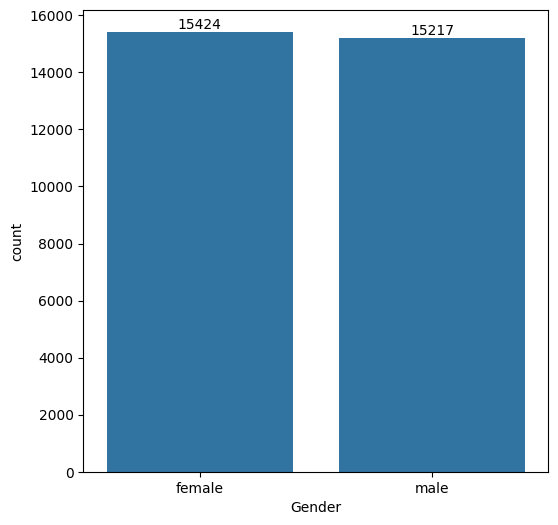

In [37]:
plt.figure(figsize=(6,6))
ax=sns.countplot(data=data,x="Gender")
ax.bar_label(ax.containers[0])
plt.show()

In [43]:
#impact of parent education on student score
gp=data.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
gp

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


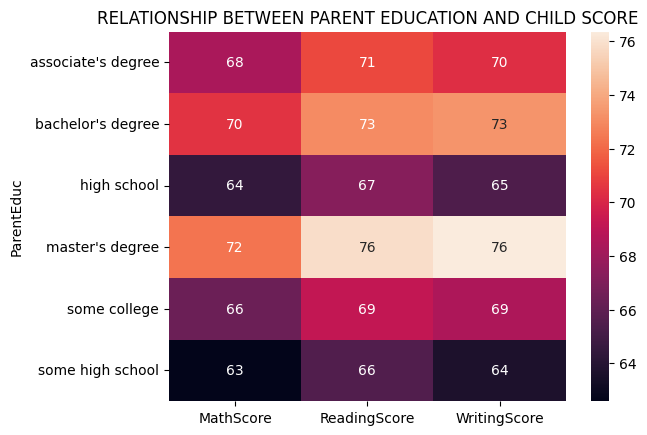

In [56]:
sns.heatmap(gp,annot=True)
plt.title("RELATIONSHIP BETWEEN PARENT EDUCATION AND CHILD SCORE")
plt.show()

In [48]:
# from the above data we realized that:
# AS MORE EDUCATED PARENT IS LINKELY THAT THEIR CHILD ARE GOOD SCORE
data.head()


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [49]:
#impact of Parentmaritalstatus
ms=data.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
ms

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


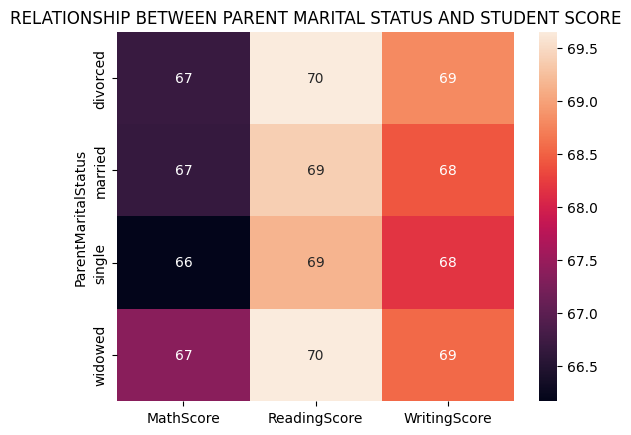

In [54]:
sns.heatmap(ms,annot=True)
plt.title("RELATIONSHIP BETWEEN PARENT MARITAL STATUS AND STUDENT SCORE")
plt.show()

In [53]:
# from above chart we can say that
#PARENT'S MARITAL STATUS HAS NEGLIGIBLE IMPACT ON STUDENT SCORE
data.head()


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [57]:
#lets find relationship between study hour and score
sh=data.groupby("WklyStudyHours").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
sh

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


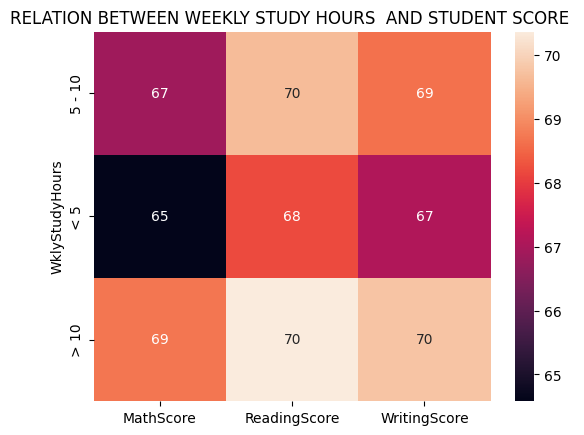

In [60]:
sns.heatmap(sh,annot=True)
plt.title("RELATION BETWEEN WEEKLY STUDY HOURS  AND STUDENT SCORE ")
plt.show()

In [61]:
#SCORE IS DIRECTLY PROOTIONAL TO WEEKLY STUDY HOURS
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


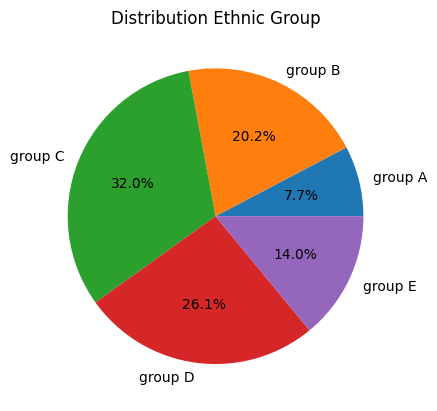

In [70]:
A=data.loc[(data["EthnicGroup"]=='group A')].count()
B=data.loc[(data["EthnicGroup"]=='group B')].count()
C=data.loc[(data["EthnicGroup"]=='group C')].count()
D=data.loc[(data["EthnicGroup"]=='group D')].count()
E=data.loc[(data["EthnicGroup"]=='group E')].count()
l=["group A","group B","group C","group D","group E"]
list1=[A["EthnicGroup"],B["EthnicGroup"],C["EthnicGroup"],D["EthnicGroup"],E["EthnicGroup"]]
plt.pie(list1,labels=l,autopct="%1.1f%%")
plt.title("Distribution Ethnic Group")
plt.show()


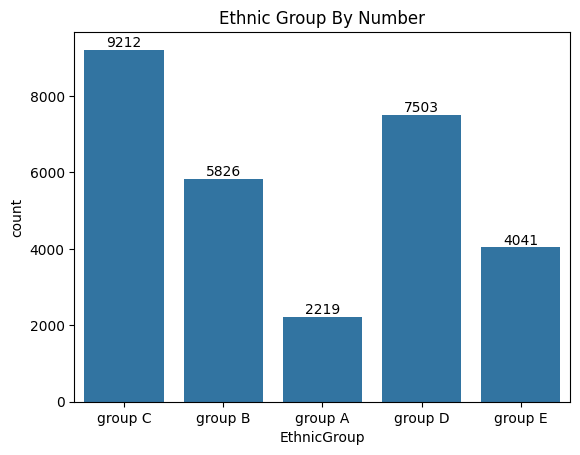

In [73]:
s=sns.countplot(data=data,x="EthnicGroup")
plt.title("Ethnic Group By Number")
s.bar_label(s.containers[0])
plt.show()

# from the above data we realized that:
# AS MORE EDUCATED PARENT IS LINKELY THAT THEIR CHILD ARE GOOD SCORE
# from above chart we can say that
# PARENT'S MARITAL STATUS HAS NEGLIGIBLE IMPACT ON STUDENT SCORE
# maximum number of child are from grop c
<!-- THANK YOU -->